In [1]:
!pip install pydub


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import librosa
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from pydub import AudioSegment

# Path to audio files
audio_folder_path = r'recordings'

# Prepare list to hold features and labels
features_list = []
genders = []
speakers = []

# Define a list of known speakers
speakers_list = ['george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler']

# Loop through each audio file in the folder
for filename in os.listdir(audio_folder_path):
    if filename.endswith(".mp3") or filename.endswith(".wav"):
        file_path = os.path.join(audio_folder_path, filename)

        # Convert MP3 to WAV if necessary
        if filename.endswith(".mp3"):
            wav_path = file_path.replace(".mp3", ".wav")
            sound = AudioSegment.from_mp3(file_path)
            sound.export(wav_path, format="wav")
            file_path = wav_path

        # Load audio
        y, sr = librosa.load(file_path, sr=None)

        # Extract features and statistics
        # MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_features = np.concatenate([np.mean(mfcc, axis=1), np.median(mfcc, axis=1),
                                        np.std(mfcc, axis=1), skew(mfcc, axis=1), kurtosis(mfcc, axis=1),
                                        np.amax(mfcc, axis=1), np.amin(mfcc, axis=1)])

        # Root Mean Square Energy
        rmse = librosa.feature.rms(y=y)
        rmse_features = [np.mean(rmse), np.median(rmse), np.std(rmse), skew(rmse, axis=1)[0], kurtosis(rmse, axis=1)[0]]

        # Chroma STFT
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_features = [np.mean(chroma), np.median(chroma), np.std(chroma), skew(chroma, axis=None), kurtosis(chroma, axis=None)]

        # Spectral Centroid
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_cent_features = [np.mean(spec_cent), np.median(spec_cent), np.std(spec_cent), skew(spec_cent, axis=1)[0], kurtosis(spec_cent, axis=1)[0]]

        # Spectral Bandwidth
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        spec_bw_features = [np.mean(spec_bw), np.median(spec_bw), np.std(spec_bw), skew(spec_bw, axis=1)[0], kurtosis(spec_bw, axis=1)[0]]

        # Spectral Rolloff
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        rolloff_features = [np.mean(rolloff), np.median(rolloff), np.std(rolloff), skew(rolloff, axis=1)[0], kurtosis(rolloff, axis=1)[0]]

        # Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y)
        zcr_features = [np.mean(zcr), np.median(zcr), np.std(zcr), skew(zcr, axis=1)[0], kurtosis(zcr, axis=1)[0]]

        # Combine all features
        combined_features = np.concatenate([mfcc_features, rmse_features, chroma_features, spec_cent_features,
                                            spec_bw_features, rolloff_features, zcr_features])
        
        features_list.append(combined_features)

        # Extract speaker name from filename
        parts = filename.split('_')
        speaker_name = parts[1]  # Extract the second part after splitting by '_'
        
        # Check if extracted speaker name is in the list of known speakers
        speakers.append(speaker_name if speaker_name in speakers_list else 'Unknown')
        genders.append('Unknown')  # You can update this part if gender information is available

# Define column names for DataFrame
mfcc_columns = [f'mfcc_mean_{i}' for i in range(13)] + [f'mfcc_median_{i}' for i in range(13)] + \
               [f'mfcc_std_{i}' for i in range(13)] + [f'mfcc_skew_{i}' for i in range(13)] + \
               [f'mfcc_kurtosis_{i}' for i in range(13)] + [f'mfcc_max_{i}' for i in range(13)] + [f'mfcc_min_{i}' for i in range(13)]

other_columns = ['rmse_mean', 'rmse_median', 'rmse_std', 'rmse_skew', 'rmse_kurtosis',
                 'chroma_mean', 'chroma_median', 'chroma_std', 'chroma_skew', 'chroma_kurtosis',
                 'spec_cent_mean', 'spec_cent_median', 'spec_cent_std', 'spec_cent_skew', 'spec_cent_kurtosis',
                 'spec_bw_mean', 'spec_bw_median', 'spec_bw_std', 'spec_bw_skew', 'spec_bw_kurtosis',
                 'rolloff_mean', 'rolloff_median', 'rolloff_std', 'rolloff_skew', 'rolloff_kurtosis',
                 'zcr_mean', 'zcr_median', 'zcr_std', 'zcr_skew', 'zcr_kurtosis']

# Create DataFrame with features and labels
columns = mfcc_columns + other_columns + ['speaker', 'gender']
df = pd.DataFrame(features_list, columns=columns[:-2])  # All features
df['speaker'] = speakers  # Add speaker labels
df['gender'] = genders  # Add gender labels

# Save to CSV
df.to_csv('voice_features_with_speaker_gender_labels.csv', index=False)
print("Features with speaker and gender labels have been extracted and saved to 'voice_features_with_speaker_gender_labels.csv'")


c:\Users\sreeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
c:\Users\sreeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1933
  warnings.warn(
c:\Users\sreeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1399
  warnings.warn(
c:\Users\sreeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1876
  warnings.warn(
c:\Users\sreeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input sign

Features with speaker and gender labels have been extracted and saved to 'voice_features_with_speaker_gender_labels.csv'


In [3]:
df

,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,rolloff_std,rolloff_skew,rolloff_kurtosis,zcr_mean,zcr_median,zcr_std,zcr_skew,zcr_kurtosis,speaker,gender
0,-164.544647,2.768874,33.804199,24.320789,-37.505180,-27.450354,-39.704735,-28.177942,-30.976017,7.688464,...,544.657334,-0.852976,-0.880189,0.124805,0.133789,0.028668,0.078872,-1.372727,george,Unknown
1,-250.517212,33.151550,-3.604604,-7.039330,-39.924980,-50.474072,-43.294243,-27.839779,-39.000805,-3.448081,...,690.509659,-0.293321,-1.758913,0.108301,0.114502,0.034068,-0.345285,-1.370069,george,Unknown
2,-312.191864,11.199822,-0.455752,6.471281,-37.523369,-36.116360,-24.461548,-35.563080,-33.041653,-11.725566,...,744.840820,-0.380913,-1.354486,0.185669,0.170166,0.077930,0.436721,-0.454903,george,Unknown
3,-262.359131,7.685692,1.497398,1.708157,-37.620552,-35.234795,-32.962078,-31.147701,-36.620857,-9.146376,...,653.280898,-0.305715,-1.597949,0.137939,0.144043,0.053630,-0.131152,-1.446112,george,Unknown
4,-249.161102,12.089952,-4.094547,9.838566,-42.190765,-37.469677,-34.216095,-30.324535,-40.210140,-7.836192,...,662.627701,-0.360510,-1.306755,0.148743,0.150146,0.067000,-0.037899,-1.581044,george,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-337.738983,76.731606,-39.082561,-17.672611,-1.143922,-15.095078,-25.414812,15.257710,-28.671196,6.298594,...,331.216448,0.294186,-1.330636,0.135661,0.143555,0.038251,-0.298495,-1.457381,yweweler,Unknown
2996,-297.299927,43.114948,-36.970203,-12.317780,-16.216482,7.408902,-28.169683,14.091930,-13.725476,8.080510,...,622.564700,-0.648584,-1.461749,0.159098,0.165039,0.047940,-0.245749,-1.178315,yweweler,Unknown
2997,-313.177032,61.267853,-34.133816,-8.630444,-17.340193,-10.258495,-22.317999,6.875137,-17.730841,-4.104269,...,384.888984,-0.004899,-1.881108,0.121175,0.126709,0.032125,-0.252248,-1.432669,yweweler,Unknown
2998,-379.725037,65.255623,-30.842026,-15.661436,-0.953381,-5.269448,-20.352783,10.367197,-10.856575,-1.159833,...,494.037184,-0.056445,-1.769569,0.135672,0.131836,0.051773,-0.135547,-1.372770,yweweler,Unknown


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load data from CSV file
file_path = 'voice_features_with_speaker_gender_labels.csv'  # Replace with your local file path
data = pd.read_csv(file_path)

# Define features (X) and target (y) columns
X = data.drop(columns=['speaker', 'gender'])  # Drop 'speaker' and 'gender' columns to get only the features
y = data['speaker']  # Define the target column as 'speaker' only

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y for each set and save them back to CSV
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to new CSV files
train_data.to_csv('training_data_speaker_only.csv', index=False)
test_data.to_csv('test_data_speaker_only.csv', index=False)

print("Training and test data have been saved to 'training_data_speaker_only.csv' and 'test_data_speaker_only.csv'.")
  # Replace with your local file path
data = pd.read_csv(file_path)

# Define features (X) and target (y) columns
X = data.drop(columns=['speaker', 'gender'])  # Drop 'speaker' and 'gender' columns to get only the features
y = data['speaker']  # Define the target column as 'speaker' only

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y for each set and save them back to CSV
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to new CSV files
train_data.to_csv('training_data_speaker_only.csv', index=False)
test_data.to_csv('test_data_speaker_only.csv', index=False)

print("Training and test data have been saved to 'training_data_speaker_only.csv' and 'test_data_speaker_only.csv'.")


Training and test data have been saved to 'training_data_speaker_only.csv' and 'test_data_speaker_only.csv'.
Training and test data have been saved to 'training_data_speaker_only.csv' and 'test_data_speaker_only.csv'.


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the train and test CSV files with extracted features
train_df = pd.read_csv('training_data_speaker_only.csv')
test_df = pd.read_csv('test_data_speaker_only.csv')

# Separate features and labels, assuming 'speaker' is the target label
y_train = train_df['speaker'].reset_index(drop=True)
train_features = train_df.drop(columns=['speaker']).reset_index(drop=True)

y_test = test_df['speaker'].reset_index(drop=True)
test_features = test_df.drop(columns=['speaker']).reset_index(drop=True)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
train_features = pd.DataFrame(imputer.fit_transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(imputer.transform(test_features), columns=test_features.columns)

# Standardize the features
scaler = StandardScaler(with_mean=False)
train_features = pd.DataFrame(scaler.fit_transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(scaler.transform(test_features), columns=test_features.columns)

# Apply PCA to retain 95% of the explained variance
pca = PCA(n_components=0.95)
train_features_pca = pca.fit_transform(train_features)
test_features_pca = pca.transform(test_features)

# Convert PCA-transformed features back to DataFrame and reset index
train_features_pca_df = pd.DataFrame(train_features_pca).reset_index(drop=True)
test_features_pca_df = pd.DataFrame(test_features_pca).reset_index(drop=True)

# Add 'speaker' labels back to the transformed data
train_features_pca_df['speaker'] = y_train
test_features_pca_df['speaker'] = y_test

# Save PCA-transformed data back to CSV
train_features_pca_df.to_csv('train_pca.csv', index=False)
test_features_pca_df.to_csv('test_pca.csv', index=False)

print("PCA transformation complete.")
print("Training features shape after PCA:", train_features_pca_df.shape)
print("Testing features shape after PCA:", test_features_pca_df.shape)
print("Explained variance by selected components:", np.sum(pca.explained_variance_ratio_))


PCA transformation complete.
Training features shape after PCA: (2400, 54)
Testing features shape after PCA: (600, 54)
Explained variance by selected components: 0.9539534011741049


In [6]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

# Load PCA-transformed train and test data
train_df = pd.read_csv(r'train_pca.csv')
test_df = pd.read_csv(r'test_pca.csv')

# Separate target labels from features
Y_train = train_df['speaker']
X_train = train_df.drop(columns=['speaker'], errors='ignore')
X_test = test_df.drop(columns=['speaker'], errors='ignore')

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA to reduce dimensionality further
pca = PCA(n_components=20)  # Reduce dimensions to 20
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Function to perform cross-validation
def cross_validate(X_train, Y_train):
    model = SVC(kernel='linear', C=0.5)  # Lower C for better generalization
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Cross-Validation Score: {scores.mean()}")

# Function to train and predict using SVM
def svm_classifier(X_train, Y_train, X_test):
    # Hyperparameter tuning using GridSearchCV
    param_grid = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)
    
    print("Best parameters for SVM:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    # Train SVM with best parameters
    best_svm = grid_search.best_estimator_
    best_svm.fit(X_train, Y_train)
    
    # Predict test data
    return best_svm.predict(X_test)

# Perform cross-validation on PCA features
cross_validate(X_train_pca, Y_train)

# Classify PCA test features using the SVM classifier
y_test_svm = svm_classifier(X_train_pca, Y_train, X_test_pca)

# Save predictions
test_df['speaker'] = y_test_svm
test_df.to_csv(r'C:/Users/sreeh/OneDrive/Desktop/Ec 502/predict_svm.csv', index=False)

print("Predictions saved to 'predict_svm.csv'")


Cross-Validation Scores: [0.81458333 0.79166667 0.80208333 0.80416667 0.80833333]
Mean Cross-Validation Score: 0.8041666666666666
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.8929166666666667
Predictions saved to 'predict_svm.csv'


Classification Report:
              precision    recall  f1-score   support

      george       0.99      0.98      0.99       101
     jackson       0.87      0.90      0.88       101
       lucas       0.96      0.97      0.96        98
     nicolas       0.84      0.88      0.86       110
        theo       0.78      0.76      0.77        96
    yweweler       0.91      0.85      0.88        94

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

Accuracy Score: 0.8916666666666667


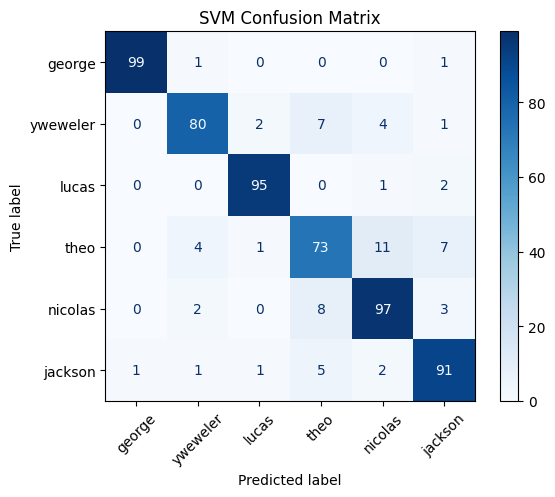

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import pandas as pd

# Load true labels for the test set (assuming the file contains the correct speaker labels)
# y_test = pd.read_csv(r'C:\Users\rakes\Desktop\Machinelearn\test_data_speaker_only.csv')['speaker']

# Display the classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_test_svm))
print("Accuracy Score:", accuracy_score(y_test, y_test_svm))

# Plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, label_names, classifier="SVM"):
    confusion_mat = confusion_matrix(y_true, y_pred, labels=label_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=label_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{classifier} Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

# Define label names for the speakers (replace with actual speaker names in your dataset)
label_names = y_test.unique()  # Automatically gets unique speaker labels from the test set

# Plot the confusion matrix using the true labels and predictions
plot_confusion_matrix(y_test, y_test_svm, label_names=label_names, classifier="SVM")


In [8]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Load train and test data
train_csv = r'training_data_speaker_only.csv'
test_csv = r'test_data_speaker_only.csv'

# Load features and labels from train data
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Extract features and labels
X_train = train_df.drop(columns=['speaker']).values  # Drop 'speaker' column to get features
Y_train = train_df['speaker'].values  # Get labels

# Encode labels to numeric values
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Process test data
X_test = test_df.drop(columns=['speaker']).values if 'speaker' in test_df.columns else test_df.values

# Impute missing values with the mean for both train and test sets
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian Mixture Model training and prediction
def train_and_predict_gmm(X_train, Y_train_encoded, X_test):
    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=len(np.unique(Y_train_encoded)), random_state=42)
    gmm.fit(X_train)
    
    # Predict on the training set for evaluation
    y_train_pred = gmm.predict(X_train)
    print("Training Classification Report:")
    print(classification_report(Y_train_encoded, y_train_pred))
    
    # Predict on the test set
    y_test_pred = gmm.predict(X_test)
    return y_test_pred

# Train GMM and predict on test data
y_test_gmm_encoded = train_and_predict_gmm(X_train, Y_train_encoded, X_test)

# Decode predictions back to original speaker names
y_test_gmm = label_encoder.inverse_transform(y_test_gmm_encoded)

# Save predictions with IDs if available, else use index
if 'new_id' in test_df.columns:
    test_df['speaker'] = y_test_gmm  # Add predictions
    output_df = test_df[['new_id', 'speaker']].rename(columns={"new_id": "id"})
else:
    output_df = pd.DataFrame({'id': test_df.index, 'speaker': y_test_gmm})

output_df.to_csv(r'C:/Users/sreeh/OneDrive/Desktop/Ec 502/predict_gmm_final.csv', index=False)
print("Predictions saved to 'predict_gmm_final.csv'")


Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       399
           1       0.41      0.48      0.45       399
           2       0.91      0.80      0.85       402
           3       0.00      0.00      0.00       390
           4       0.33      0.18      0.24       404
           5       0.27      0.36      0.31       406

    accuracy                           0.47      2400
   macro avg       0.49      0.47      0.47      2400
weighted avg       0.49      0.47      0.47      2400

Predictions saved to 'predict_gmm_final.csv'


Classification Report:
              precision    recall  f1-score   support

      george       1.00      0.99      1.00       101
     jackson       0.38      0.46      0.41       101
       lucas       0.86      0.81      0.83        98
     nicolas       0.00      0.00      0.00       110
        theo       0.33      0.15      0.20        96
    yweweler       0.24      0.35      0.29        94

    accuracy                           0.45       600
   macro avg       0.47      0.46      0.45       600
weighted avg       0.46      0.45      0.45       600

Accuracy Score: 0.4533


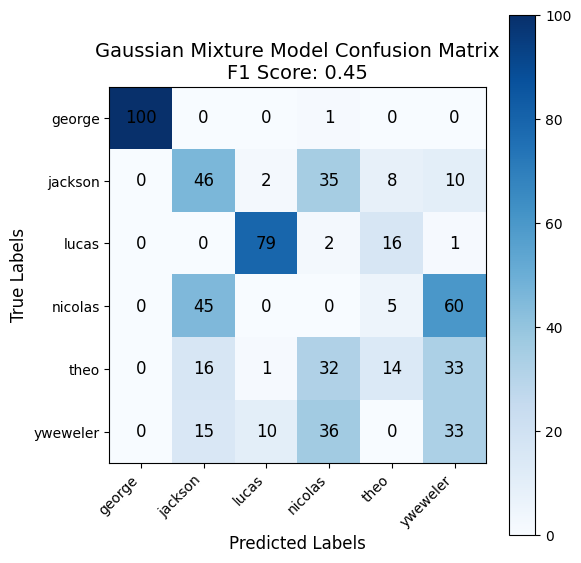

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Define a function to plot the confusion matrix with F1 score in the title
def plot_confusion_matrix_with_f1(y_true, y_pred, label_names, classifier="Gaussian Mixture Model"):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred, labels=label_names)
    
    # Calculate the F1 score (weighted) and accuracy score
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    
    # Display the classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=label_names))
    print(f"Accuracy Score: {accuracy:.4f}")
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(confusion_mat, cmap=plt.cm.Blues, interpolation='nearest')
    plt.title(f"{classifier} Confusion Matrix\nF1 Score: {f1:.2f}", fontsize=14)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.xticks(np.arange(len(label_names)), label_names, rotation=45, ha='right')
    plt.yticks(np.arange(len(label_names)), label_names)
    plt.colorbar()

    # Display counts in each cell of the confusion matrix
    for (i, j), label in np.ndenumerate(confusion_mat):
        plt.text(j, i, label, ha='center', va='center', fontsize=12, color="black")
    
    plt.tight_layout()
    plt.show()

# Assuming `y_test` contains the true labels for the test set
# Load `y_test` as the true speaker labels if not already loaded
y_test = test_df['speaker'].values  # True labels for the test set

# Define label names based on unique speaker names in `y_test`
label_names = np.unique(y_test)

# Assuming `y_test_gmm` contains the predicted labels from the GMM model
plot_confusion_matrix_with_f1(y_test, y_test_gmm, label_names=label_names, classifier="Gaussian Mixture Model")


By Comparing Both the Models SVM & GMM Svm Model Performs better than the GMM with 89% Accuracy. So this is the best Model for this Classification Problem